<a href="https://colab.research.google.com/github/dgb1106/fake-news-detection/blob/main/Fake_news_detection_dgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
import string
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_fake = pd.read_csv('/content/drive/MyDrive/fake_news_detection_dataset/Fake.csv')
df_true = pd.read_csv('/content/drive/MyDrive/fake_news_detection_dataset/True.csv')

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake['class'] = 0
df_true['class'] = 1

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

Check whether there are any Na values?

In [ ]:
df_fake.isna().sum()

,0
title,0
text,0
subject,0
date,0
class,0


In [ ]:
df_true.isna().sum()

,0
title,0
text,0
subject,0
date,0
class,0


Merge 2 sets

In [ ]:
df = pd.concat([df_fake, df_true], axis=0)
df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

Drop unneeded data

In [ ]:
data = df.drop(['title', 'subject', 'date'], axis=1)
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
data.isnull().sum()

,0
text,0
class,0


Shuffle the dataframe, `frac=1` means to receive 100% of the set after shuffling

In [ ]:
data = data.sample(frac = 1)
data.head()

,text,class
14592,You can blame the escalating debt on Obamacare...,0
21578,Never mind the fact that Kid Rock fought for a...,0
7467,Tuesday night was a very big night for Democra...,0
2577,There s a good chance that you haven t been in...,0
10701,WASHINGTON (Reuters) - Senate Majority Leader ...,1


In [ ]:
data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)
data.head()

,text,class
0,You can blame the escalating debt on Obamacare...,0
1,Never mind the fact that Kid Rock fought for a...,0
2,Tuesday night was a very big night for Democra...,0
3,There s a good chance that you haven t been in...,0
4,WASHINGTON (Reuters) - Senate Majority Leader ...,1


In [ ]:
def wordopt(text):
  text = text.lower()
  text = re.sub('\[,*?\]', '', text)
  # this line removes [] and the content inside it from `text`
  text = re.sub('\\W', ' ', text)
  # this line removes characters that are not digits or letters and replace it with a space
  text = re.sub('https?://\S+|www\.\S+', '', text)
  # this line removes URLS from the text
  text = re.sub('<.*?>+', '', text)
  # this line removes HTML tags from the text
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  # this line removes all punctuation marks from the text
  text = re.sub('\n', '', text)
  # this line removes all new line characters `\n` from the text
  text = re.sub('\w*\d\w*', '', text)
  # this line removes any words containing digits from the text
  return text

In [ ]:
data['text'] = data['text'].apply(wordopt)
data.head()

,text,class
0,you can blame the escalating debt on obamacare...,0
1,never mind the fact that kid rock fought for a...,0
2,tuesday night was a very big night for democra...,0
3,there s a good chance that you haven t been in...,0
4,washington reuters senate majority leader ...,1


In [ ]:
x = data['text']
y = data['class']

In [ ]:
x_train, x_text, y_train, y_test = train_test_split(x, y, test_size=0.25)

Train

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_text)

Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_test)

In [ ]:
LR_score = LR.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5901
           1       0.99      0.99      0.99      5324

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT_score = DT.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5901
           1       1.00      1.00      1.00      5324

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gb = GB.predict(xv_test)

In [ ]:
GB_score = GB.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5901
           1       0.99      1.00      1.00      5324

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_RF = RF.predict(xv_test)

In [ ]:
RF_score = RF.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5901
           1       0.99      0.99      0.99      5324

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
def output_label(n):
  if n == 0:
    return 'Fake News'
  elif n == 1:
    return 'True News'

In [ ]:
def manual_testing(news):
  testing_news = {'text': [news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test['text'] = new_def_test['text'].apply(wordopt)
  new_x_test = new_def_test['text']
  new_xv_test = vectorization.transform(new_x_test)
  pred_LR = LR.predict(new_xv_test)
  pred_DT = DT.predict(new_xv_test)
  pred_GB = GB.predict(new_xv_test)
  pred_RF = RF.predict(new_xv_test)
  print(f"LR Prediction: {output_label(pred_LR[0])}")
  print(f"DT Prediction: {output_label(pred_DT[0])}")
  print(f"GB Prediction: {output_label(pred_GB[0])}")
  print(f"RF Prediction: {output_label(pred_RF[0])}")

In [ ]:
news = str(input())
manual_testing(news)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

In [ ]:
news = str(input())
manual_testing(news)

SEATTLE/WASHINGTON (Reuters) - President Donald Trump called on the U.S. Postal Service on Friday to charge â€œmuch moreâ€ to ship packages for Amazon (AMZN.O), picking another fight with an online retail giant he has criticized in the past.     â€œWhy is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE!â€ Trump wrote on Twitter.  The presidentâ€™s tweet drew fresh attention to the fragile finances of the Postal Service at a time when tens of millions of parcels have just been shipped all over the country for the holiday season.  The U.S. Postal Service, which runs at a big loss, is an independent agency within the federal government and does not receive tax dollars for operating expenses, according to its website.  Package delivery has become an increasingly important part of its business as the 

Compare

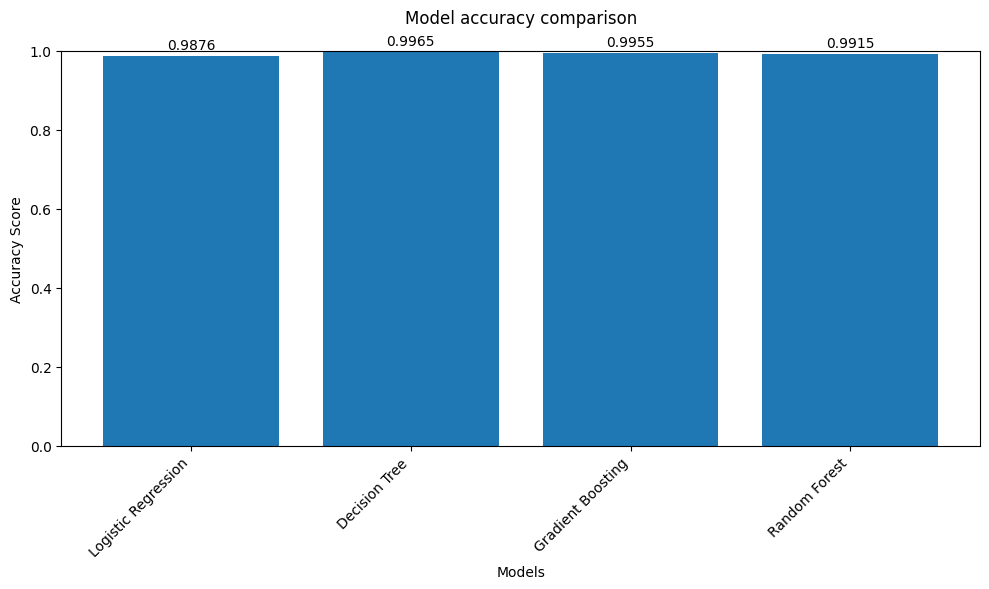

In [ ]:
selected_models = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
scores = [LR_score, DT_score, GB_score, RF_score]

plt.figure(figsize=(10, 6))
plt.bar(selected_models, scores)
plt.title('Model accuracy comparison', pad=20)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(scores):
  plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.show()